### LightGBM

파라미터 튜닝 :

데이터 사이언티스트는 언제나 어떤 파라미터를 언제 사용할지 그리고 어떤 값이 최적의 파라미터 값일지 결정하기 위해 고민합니다.

아래 소개되는 기법들은 모델 정확도를 향상시키기 위해 사용될 수 있습니다.

num_leaves : Tree 모델의 복잡성을 컨트롤하는 주요 파라미터입니다. 이상적으로 num_leaves 값은 2 ^ (max_depth) 값보다 적거나 같아야 합니다. 이것보다 많은 값은 과적합을 유발할 것입니다.
min_data_in_leaf : 큰 값으로 세팅하는 것은 Tree가 너무 깊게 확장되는 것을 막을 수 있지만 under-fitting 언더 피팅이 발생할 수도 있습니다. 관행적으로, 수백 또는 수천 개로 정하는 것이 큰 데이터 세트에 충분합니다.
max_depth : Tree 깊이를 명확하게 제한하기 위해 max_depth 값을 설정할 수도 있습니다.
##### 더 빠른 속도를 위하여 :

bagging_fraction과 baggin_freq 을 설정하여 bagging 을 적용하십시오
feature_fraction을 설정하여 feature sub-sampling을 하십시오
작은 max_bin 값을 사용하십시오
save_binary 를 값을 통해 다가오는 학습에서 데이터 로딩 속도를 줄이십시오
parallel learning 병렬 학습을 적용하십시오
##### 더 나은 정확도를 위해 :

큰 max_bin 값을 사용하십시오 (아마 속도는 느려질 수 있습니다)
작은 learning_rate 값을 큰 num_iterations 값과 함께 사용하십시오
큰 num_leaves 값을 사용하십시오 (아마 과적합을 유발할 수도 있습니다)
더 큰 트레이닝 데이터를 사용하십시오
dart 를 사용하십시오
범주형 feature를 사용하십시오
##### 과적합을 해결하기 위해 :

작은 max_bin 값을 사용하십시오
작은 num_leaves 값을 사용하십시오
min_data_in_leaf 와 min_sum_hessian_in_leaf 파라미터를 사용하십시오
bagging_fraction 과 bagging_freq 을 사용하여 bagging 을 적용하십시오
feature_fraction을 세팅하여 feature sub-sampling을 하십시오
lambda_l1, lambda_l2 그리고 min_gain_to_split 파라미터를 이용해 regularization (정규화) 를 적용하십시오
max_depth 를 설정해 Deep Tree 가 만들어지는 것을 방지하십시오

In [7]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf


train = pd.read_csv('data/train_features.csv')
train_labels = pd.read_csv('data/train_labels.csv')
test = pd.read_csv('data/test_features.csv')
submission = pd.read_csv('data/sample_submission.csv')

X=tf.reshape(np.array(train.iloc[:,2:]),[-1, 600, 6])
y = tf.keras.utils.to_categorical(train_labels['label']) 
X.shape

TensorShape([3125, 600, 6])

In [15]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Conv2D
from keras.layers import Flatten

# 2. 모델 구성하기
model = Sequential()
model.add(Conv1D(256,3,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dense(61, activation='softmax'))
# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# 4. 모델 학습시키기
hist = model.fit(X, y, epochs=100, batch_size=64,  validation_split=0.2, callbacks = [es])

Epoch 1/100
40/40 [==============================] - 8s 131ms/step - loss: 22.5615 - accuracy: 0.2751 - val_loss: 4.6657 - val_accuracy: 0.3504
Epoch 2/100
40/40 [==============================] - 5s 117ms/step - loss: 4.0227 - accuracy: 0.4109 - val_loss: 3.5072 - val_accuracy: 0.4320
Epoch 3/100
40/40 [==============================] - 5s 115ms/step - loss: 3.3088 - accuracy: 0.4177 - val_loss: 3.5132 - val_accuracy: 0.3488
Epoch 4/100
40/40 [==============================] - 5s 125ms/step - loss: 3.1919 - accuracy: 0.4366 - val_loss: 2.9088 - val_accuracy: 0.5120
Epoch 5/100
40/40 [==============================] - 4s 107ms/step - loss: 2.5501 - accuracy: 0.4997 - val_loss: 2.7860 - val_accuracy: 0.4800
Epoch 6/100
40/40 [==============================] - 4s 98ms/step - loss: 2.5033 - accuracy: 0.5060 - val_loss: 2.6497 - val_accuracy: 0.5168
Epoch 7/100
40/40 [==============================] - 4s 98ms/step - loss: 2.3933 - accuracy: 0.5224 - val_loss: 2.6803 - val_accuracy: 0.5056


Epoch 58/100
40/40 [==============================] - 6s 156ms/step - loss: 0.9552 - accuracy: 0.7275 - val_loss: 1.8219 - val_accuracy: 0.6256
Epoch 59/100
40/40 [==============================] - 6s 143ms/step - loss: 0.9211 - accuracy: 0.7450 - val_loss: 1.8486 - val_accuracy: 0.6240
Epoch 60/100
40/40 [==============================] - 6s 153ms/step - loss: 0.8330 - accuracy: 0.7571 - val_loss: 1.8597 - val_accuracy: 0.6448
Epoch 61/100
40/40 [==============================] - 6s 145ms/step - loss: 0.8802 - accuracy: 0.7338 - val_loss: 1.9463 - val_accuracy: 0.6192
Epoch 00061: early stopping


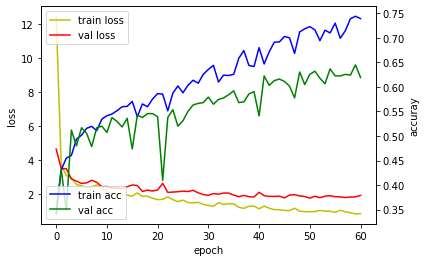

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [25]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Conv2D, MaxPooling1D
from keras.layers import Flatten

# 2. 모델 구성하기
model = Sequential()
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(128))
model.add(Dense(61, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# 4. 모델 학습시키기
hist = model.fit(X, y, epochs=100, batch_size=64,  validation_split=0.2, callbacks = [es])

Epoch 1/100
40/40 [==============================] - 37s 611ms/step - loss: 3.0409 - accuracy: 0.4274 - val_loss: 2.5236 - val_accuracy: 0.5184
Epoch 2/100
40/40 [==============================] - 21s 525ms/step - loss: 2.4937 - accuracy: 0.5055 - val_loss: 2.3681 - val_accuracy: 0.5280
Epoch 3/100
40/40 [==============================] - 25s 619ms/step - loss: 2.3078 - accuracy: 0.5088 - val_loss: 2.2262 - val_accuracy: 0.5360
Epoch 4/100
40/40 [==============================] - 25s 624ms/step - loss: 2.1286 - accuracy: 0.5333 - val_loss: 2.1333 - val_accuracy: 0.5440
Epoch 5/100
40/40 [==============================] - 24s 600ms/step - loss: 2.0816 - accuracy: 0.5163 - val_loss: 2.0863 - val_accuracy: 0.5392
Epoch 6/100
40/40 [==============================] - 22s 542ms/step - loss: 1.9826 - accuracy: 0.5362 - val_loss: 1.9218 - val_accuracy: 0.5632
Epoch 7/100
40/40 [==============================] - 20s 504ms/step - loss: 1.8281 - accuracy: 0.5655 - val_loss: 1.8762 - val_accuracy:

40/40 [==============================] - 17s 432ms/step - loss: 0.3548 - accuracy: 0.9314 - val_loss: 1.1296 - val_accuracy: 0.7056
Epoch 58/100
40/40 [==============================] - 18s 461ms/step - loss: 0.4014 - accuracy: 0.9214 - val_loss: 1.1606 - val_accuracy: 0.6784
Epoch 59/100
40/40 [==============================] - 17s 422ms/step - loss: 0.4060 - accuracy: 0.9086 - val_loss: 1.1539 - val_accuracy: 0.7024
Epoch 60/100
40/40 [==============================] - 19s 468ms/step - loss: 0.3792 - accuracy: 0.9188 - val_loss: 1.1496 - val_accuracy: 0.7136
Epoch 61/100
40/40 [==============================] - 17s 439ms/step - loss: 0.3603 - accuracy: 0.9277 - val_loss: 1.1629 - val_accuracy: 0.6960
Epoch 62/100
40/40 [==============================] - 18s 445ms/step - loss: 0.3250 - accuracy: 0.9388 - val_loss: 1.2074 - val_accuracy: 0.6912
Epoch 63/100
40/40 [==============================] - 19s 466ms/step - loss: 0.3707 - accuracy: 0.9148 - val_loss: 1.1339 - val_accuracy: 0.712

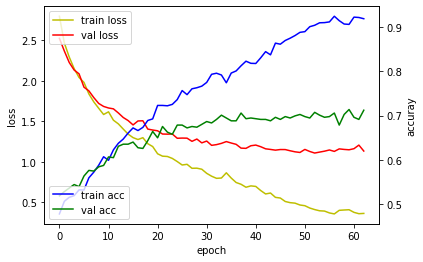

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [28]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
test_X.shape
prediction=model.predict(test_X)
submission.iloc[:,1:]=prediction
submission.to_csv('output/cnn_lstm.csv', index=False)

In [31]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Conv2D, MaxPooling1D
from keras.layers import Flatten

# 2. 모델 구성하기
model = Sequential()
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(128))
model.add(Dense(61, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# 4. 모델 학습시키기
hist = model.fit(X, y, epochs=100, batch_size=64,  validation_split=0.2, callbacks = [es])

Epoch 1/100
40/40 [==============================] - 21s 314ms/step - loss: 2.9730 - accuracy: 0.4250 - val_loss: 2.4917 - val_accuracy: 0.5232
Epoch 2/100
40/40 [==============================] - 11s 288ms/step - loss: 2.4773 - accuracy: 0.5075 - val_loss: 2.3970 - val_accuracy: 0.5344
Epoch 3/100
40/40 [==============================] - 12s 290ms/step - loss: 2.3910 - accuracy: 0.5085 - val_loss: 2.2595 - val_accuracy: 0.5280
Epoch 4/100
40/40 [==============================] - 11s 278ms/step - loss: 2.2002 - accuracy: 0.5215 - val_loss: 2.1785 - val_accuracy: 0.5360
Epoch 5/100
40/40 [==============================] - 11s 278ms/step - loss: 2.1929 - accuracy: 0.5106 - val_loss: 2.1169 - val_accuracy: 0.5408
Epoch 6/100
40/40 [==============================] - 12s 290ms/step - loss: 2.0652 - accuracy: 0.5240 - val_loss: 2.0256 - val_accuracy: 0.5552
Epoch 7/100
40/40 [==============================] - 12s 293ms/step - loss: 1.9644 - accuracy: 0.5395 - val_loss: 1.9767 - val_accuracy:

Epoch 58/100
40/40 [==============================] - 13s 324ms/step - loss: 0.1277 - accuracy: 0.9947 - val_loss: 1.0955 - val_accuracy: 0.7248
Epoch 59/100
40/40 [==============================] - 14s 359ms/step - loss: 0.1322 - accuracy: 0.9908 - val_loss: 1.0795 - val_accuracy: 0.7248
Epoch 60/100
40/40 [==============================] - 14s 345ms/step - loss: 0.1151 - accuracy: 0.9916 - val_loss: 1.1232 - val_accuracy: 0.7216
Epoch 00060: early stopping


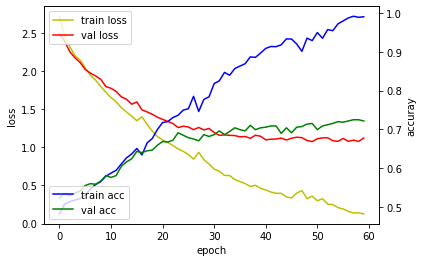

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [34]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
test_X.shape
prediction=model.predict(test_X)
submission.iloc[:,1:]=prediction
submission.to_csv('output/cnn_lstm_v2.csv', index=False)

In [35]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Conv2D, MaxPooling1D
from keras.layers import Flatten

# 2. 모델 구성하기
model = Sequential()
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(128))
model.add(Dense(61, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# 4. 모델 학습시키기
hist = model.fit(X, y, epochs=100, batch_size=64,  validation_split=0.2, callbacks = [es])

Epoch 1/100
40/40 [==============================] - 27s 389ms/step - loss: 2.9400 - accuracy: 0.4332 - val_loss: 2.4548 - val_accuracy: 0.5216
Epoch 2/100
40/40 [==============================] - 12s 292ms/step - loss: 2.4985 - accuracy: 0.4944 - val_loss: 2.3071 - val_accuracy: 0.5328
Epoch 3/100
40/40 [==============================] - 12s 306ms/step - loss: 2.2838 - accuracy: 0.5203 - val_loss: 2.2622 - val_accuracy: 0.5312
Epoch 4/100
40/40 [==============================] - 13s 326ms/step - loss: 2.2152 - accuracy: 0.5162 - val_loss: 2.1827 - val_accuracy: 0.5360
Epoch 5/100
40/40 [==============================] - 12s 291ms/step - loss: 2.0916 - accuracy: 0.5339 - val_loss: 2.1004 - val_accuracy: 0.5392
Epoch 6/100
40/40 [==============================] - 12s 295ms/step - loss: 2.0593 - accuracy: 0.5338 - val_loss: 2.0327 - val_accuracy: 0.5456
Epoch 7/100
40/40 [==============================] - 12s 311ms/step - loss: 1.9368 - accuracy: 0.5444 - val_loss: 1.9662 - val_accuracy:

40/40 [==============================] - 14s 344ms/step - loss: 0.1455 - accuracy: 0.9899 - val_loss: 1.1783 - val_accuracy: 0.7136
Epoch 58/100
40/40 [==============================] - 12s 302ms/step - loss: 0.1321 - accuracy: 0.9900 - val_loss: 1.1098 - val_accuracy: 0.7152
Epoch 59/100
40/40 [==============================] - 12s 308ms/step - loss: 0.1277 - accuracy: 0.9921 - val_loss: 1.1438 - val_accuracy: 0.7040
Epoch 60/100
40/40 [==============================] - 14s 347ms/step - loss: 0.1053 - accuracy: 0.9953 - val_loss: 1.1773 - val_accuracy: 0.7152
Epoch 61/100
40/40 [==============================] - 13s 323ms/step - loss: 0.0839 - accuracy: 0.9980 - val_loss: 1.1470 - val_accuracy: 0.7200
Epoch 62/100
40/40 [==============================] - 12s 287ms/step - loss: 0.0892 - accuracy: 0.9969 - val_loss: 1.1506 - val_accuracy: 0.7104
Epoch 63/100
40/40 [==============================] - 12s 306ms/step - loss: 0.0791 - accuracy: 0.9993 - val_loss: 1.1920 - val_accuracy: 0.715

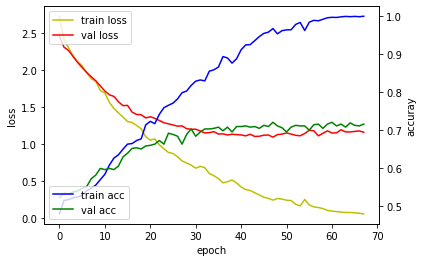

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [37]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
test_X.shape
prediction=model.predict(test_X)
submission.iloc[:,1:]=prediction
submission.to_csv('output/cnn_lstm_v3.csv', index=False)

In [40]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Conv2D, MaxPooling1D
from keras.layers import Flatten

# 2. 모델 구성하기
model = Sequential()
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(128))
model.add(Dense(61, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# 4. 모델 학습시키기
hist = model.fit(X, y, epochs=100, batch_size=64,  validation_split=0.2, callbacks = [es])

Epoch 1/100
40/40 [==============================] - 52s 895ms/step - loss: 3.0471 - accuracy: 0.4276 - val_loss: 2.5712 - val_accuracy: 0.5136
Epoch 2/100
40/40 [==============================] - 27s 683ms/step - loss: 2.5970 - accuracy: 0.5005 - val_loss: 2.4469 - val_accuracy: 0.5264
Epoch 3/100
40/40 [==============================] - 37s 933ms/step - loss: 2.3919 - accuracy: 0.5228 - val_loss: 2.3579 - val_accuracy: 0.5312
Epoch 4/100
40/40 [==============================] - 36s 890ms/step - loss: 2.3411 - accuracy: 0.5071 - val_loss: 2.3149 - val_accuracy: 0.5248
Epoch 5/100
40/40 [==============================] - 36s 906ms/step - loss: 2.3111 - accuracy: 0.5142 - val_loss: 2.2556 - val_accuracy: 0.5264
Epoch 6/100
40/40 [==============================] - 37s 919ms/step - loss: 2.2587 - accuracy: 0.5141 - val_loss: 2.1977 - val_accuracy: 0.5248
Epoch 7/100
40/40 [==============================] - 36s 902ms/step - loss: 2.2031 - accuracy: 0.5104 - val_loss: 2.1372 - val_accuracy:

40/40 [==============================] - 37s 932ms/step - loss: 0.2363 - accuracy: 0.9685 - val_loss: 1.0773 - val_accuracy: 0.7120
Epoch 58/100
40/40 [==============================] - 37s 932ms/step - loss: 0.2348 - accuracy: 0.9687 - val_loss: 1.0460 - val_accuracy: 0.7264
Epoch 59/100
40/40 [==============================] - 38s 952ms/step - loss: 0.2410 - accuracy: 0.9689 - val_loss: 1.0760 - val_accuracy: 0.7168
Epoch 60/100
40/40 [==============================] - 38s 959ms/step - loss: 0.1950 - accuracy: 0.9771 - val_loss: 1.0932 - val_accuracy: 0.7152
Epoch 61/100
40/40 [==============================] - 38s 963ms/step - loss: 0.1777 - accuracy: 0.9816 - val_loss: 1.0594 - val_accuracy: 0.7280
Epoch 62/100
40/40 [==============================] - 38s 963ms/step - loss: 0.1549 - accuracy: 0.9909 - val_loss: 1.0800 - val_accuracy: 0.7104
Epoch 63/100
40/40 [==============================] - 38s 954ms/step - loss: 0.1795 - accuracy: 0.9842 - val_loss: 1.0788 - val_accuracy: 0.718

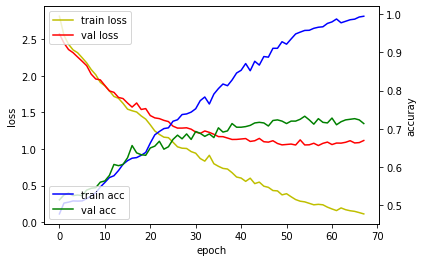

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [42]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
test_X.shape
prediction=model.predict(test_X)
submission.iloc[:,1:]=prediction
submission.to_csv('output/pool2.csv', index=False)